In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mmsidailycsvs10v22020/mmsi-daily-csvs-10-v2-2020/2020-07-10.csv
/kaggle/input/mmsidailycsvs10v22020/mmsi-daily-csvs-10-v2-2020/2020-10-15.csv
/kaggle/input/mmsidailycsvs10v22020/mmsi-daily-csvs-10-v2-2020/2020-10-21.csv
/kaggle/input/mmsidailycsvs10v22020/mmsi-daily-csvs-10-v2-2020/2020-08-19.csv
/kaggle/input/mmsidailycsvs10v22020/mmsi-daily-csvs-10-v2-2020/2020-04-19.csv
/kaggle/input/mmsidailycsvs10v22020/mmsi-daily-csvs-10-v2-2020/2020-09-23.csv
/kaggle/input/mmsidailycsvs10v22020/mmsi-daily-csvs-10-v2-2020/2020-06-13.csv
/kaggle/input/mmsidailycsvs10v22020/mmsi-daily-csvs-10-v2-2020/2020-01-05.csv
/kaggle/input/mmsidailycsvs10v22020/mmsi-daily-csvs-10-v2-2020/2020-02-23.csv
/kaggle/input/mmsidailycsvs10v22020/mmsi-daily-csvs-10-v2-2020/2020-02-08.csv
/kaggle/input/mmsidailycsvs10v22020/mmsi-daily-csvs-10-v2-2020/2020-12-26.csv
/kaggle/input/mmsidailycsvs10v22020/mmsi-daily-csvs-10-v2-2020/2020-01-04.csv
/kaggle/input/mmsidailycsvs10v22020/mmsi-daily-csvs-10-v2-2020/2

# Анализ данных 

# Описание на английском

Daily Fishing Effort at 10th Degree Resolution by MMSI, version 2.0, 2012-2020

Fishing effort and vessel presence data is available in the following formats:
 - BigQuery Tables (global-fishing-watch.gfw_public_data.fishing_effort_byvessel_v2)
 - CSVs

Description:
Fishing effort and vessel presence is binned into grid cells 0.1 degrees on a side, and measured in units of hours. The time is calculated by assigning an amount of time to each AIS detection (which is the time to the previous AIS position), and then summing all positions in each grid cell. Data is based on fishing detections of >114,000 unique AIS devices on fishing vessels, of which ~70,000 are active each year. Fishing vessels are identified via a neural network classifier and vessel registry databases. Fishing effort for squid jiggers is not calculated through the neural network, but instead through this heuristic (https://github.com/GlobalFishingWatch/global-footprint-of-fisheries/blob/master/data_production/updated-algorithm-for-squid-jiggers.md).

Vessel information for each MMSI, including flag state, geartype, and vessel dimensions is provided in a separate file (fishing-vessels-v2.csv).

Table Schema:
 - date: Date in YYYY-MM-DD format
 - cell_ll_lat: the latitude of the lower left corner of the grid cell, in decimal degrees
 - cell_ll_lon: the longitude of the lower left corner of the grid cell, in decimal degrees
 - mmsi: Maritime Mobile Service Identity, the identifier for AIS
 - hours: hours that the vessel was present in this gridcell on this day
 - fishing_hours: hours that the vessel was fishing in this grid cell on this day

For additional information about the initial release of this dataset, see the associated journal article: D.A. Kroodsma, J. Mayorga, T. Hochberg, N.A. Miller, K. Boerder, F. Ferretti, A. Wilson, B. Bergman, T.D. White, B.A. Block, P. Woods, B. Sullivan, C. Costello, and B. Worm. "Tracking the global footprint of fisheries." Science 361.6378 (2018). (http://science.sciencemag.org/content/359/6378/904)

Unless otherwise stated, Global Fishing Watch data is licensed under a Creative Commons Attribution-ShareAlike 4.0 International license(https://creativecommons.org/licenses/by-sa/4.0/) and code under an Apache 2.0 license (http://www.apache.org/licenses/LICENSE-2.0).

# Перевод
Ежедневное рыболовное усилие при разрешении 10-й степени по MMSI, версия 2.0, 2012–2020 гг.

Данные о промысловом усилии и присутствии судов доступны в следующих форматах:

Таблицы BigQuery (global-fishing-watch.gfw_public_data.fishing_effort_byvessel_v2)
CSV

Описание:
Промысловое усилие и присутствие судов объединяются в ячейки сетки со стороной 0,1 градуса и измеряются в часах. Время рассчитывается путем присвоения количества времени каждому обнаружению AIS (которое является временем до предыдущей позиции AIS), а затем суммирования всех позиций в каждой ячейке сетки. Данные основаны на обнаружении более 114 000 уникальных устройств АИС на рыболовных судах, из которых около 70 000 активны каждый год. Рыболовные суда идентифицируются с помощью классификатора нейронной сети и баз данных реестра судов. Усилие лова кальмара-джиггера рассчитывается не с помощью нейронной сети, а с помощью этой эвристики (https://github.com/GlobalFishingWatch/global-footprint-of-fisheries/blob/master/data_production/updated-algorithm-for-squid). -jiggers.md).

Информация о судне для каждого MMSI, включая состояние флага, тип снастей и размеры судна, предоставляется в отдельном файле (fishing-vessels-v2.csv).

__Схема таблицы:__
 - дата: Дата в формате ГГГГ-ММ-ДД
 - cell_ll_lat: широта нижнего левого угла ячейки сетки в десятичных градусах
 - cell_ll_lon: долгота нижнего левого угла ячейки сетки в десятичных градусах
 - mmsi: идентификатор морской подвижной службы, идентификатор AIS.
 - часы: часы, в течение которых судно находилось в этой ячейке сетки в этот день.
 -fishing_hours: часы, в течение которых судно ловило рыбу в этой ячейке сетки в этот день

Дополнительные сведения о первоначальном выпуске этого набора данных см. в соответствующей журнальной статье: D.A. Крудсма, Дж. Майорга, Т. Хохберг, Н.А. Миллер, К. Бурдер, Ф. Ферретти, А. Уилсон, Б. Бергман, Т.Д. Уайт, Б.А. Блок, П. Вудс, Б. Салливан, К. Костелло и Б. Ворм. «Отслеживание глобального воздействия рыболовства». Наука 361.6378 (2018). (http://science.sciencemag.org/content/359/6378/904)

In [91]:
import torch
import torch.nn as nn
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# HTML 
from IPython.display import HTML


In [10]:
df = pd.read_csv("/kaggle/input/mmsidailycsvs10v22020/mmsi-daily-csvs-10-v2-2020/2020-01-01.csv")
df.head(100)

,date,cell_ll_lat,cell_ll_lon,mmsi,hours,fishing_hours
0,2020-01-01,0.0,-5.3,228128000,0.5616,0.0000
1,2020-01-01,0.0,-6.1,228168000,0.4247,0.0000
2,2020-01-01,0.0,-157.9,367672410,0.9838,0.0000
3,2020-01-01,0.0,88.6,412209145,0.2422,0.0000
4,2020-01-01,0.0,59.4,412421068,1.6341,0.0000
...,...,...,...,...,...,...
95,2020-01-01,2.0,179.5,577416000,0.7186,0.7186
96,2020-01-01,2.0,179.4,577416000,0.6322,0.6322
97,2020-01-01,2.0,179.2,577416000,0.7172,0.7172
98,2020-01-01,2.0,179.3,577416000,2.5299,1.5805


In [13]:
df[df["mmsi"] == 412209145]


,date,cell_ll_lat,cell_ll_lon,mmsi,hours,fishing_hours
3,2020-01-01,0.0,88.6,412209145,0.2422,0.0
111,2020-01-01,-2.0,86.4,412209145,1.1863,0.0
9200,2020-01-01,-0.5,88.0,412209145,0.9344,0.0
9284,2020-01-01,-1.0,87.6,412209145,0.5230,0.0
9418,2020-01-01,-1.5,87.0,412209145,0.9311,0.0
31262,2020-01-01,0.3,88.9,412209145,2.1919,0.0
31263,2020-01-01,0.3,88.8,412209145,0.3877,0.0
31307,2020-01-01,-0.3,88.2,412209145,2.8847,0.0
31362,2020-01-01,0.6,89.2,412209145,2.8649,0.0
31394,2020-01-01,-0.6,87.9,412209145,0.7941,0.0


## Tescase df["mmsi"] == 412209145

https://www.kaggle.com/code/subinium/how-to-use-matplotlib-animations-in-kaggle/notebook

In [124]:
dftest = df[df["mmsi"] == 412209145]

fig, ax = plt.subplots()
fig.set_figheight(15)
fig.set_figwidth(15)

plt.title("Ship 412209145")
# ax.set_xlim([min(dftest["cell_ll_lat"]) - 1, max(dftest["cell_ll_lat"]) + 1])
# ax.set_ylim([min(dftest["cell_ll_lon"]) - 1, max(dftest["cell_ll_lon"]) + 1])
x = np.array(dftest["cell_ll_lat"])
# normalise x
x  = x - min(x)
x = 32 * x / max(x)

# normalise y
y = np.array(dftest["cell_ll_lon"])
y  = y - min(y)
y = 32 * y / max(y)

ax.set_xlim([min(x) - 1, max(x) + 1])
ax.set_ylim([min(y) - 1, max(y) + 1])

tail, = plt.plot([x[0]], [y[0]])
redDot, = plt.plot([x[0]], [y[0]], 'ro')

def animate(i):
    if i < 4:
        tail.set_data(x[:i], y[:i])
    else:
        tail.set_data(x[i-4:i], y[i-4:i])
    redDot.set_data(x[i-1:i], y[i-1:i])
    return redDot, tail

myAnimation = animation.FuncAnimation(fig, animate, 
                                      interval=len(x)-1, blit=True, 
                                      repeat=True)
plt.close(fig)

%time myAnimation.save('myAnimation1.gif', writer='imagemagick', fps=2)
HTML('<img src="./myAnimation1.gif" />')

CPU times: user 4.57 s, sys: 481 ms, total: 5.05 s
Wall time: 1min 2s


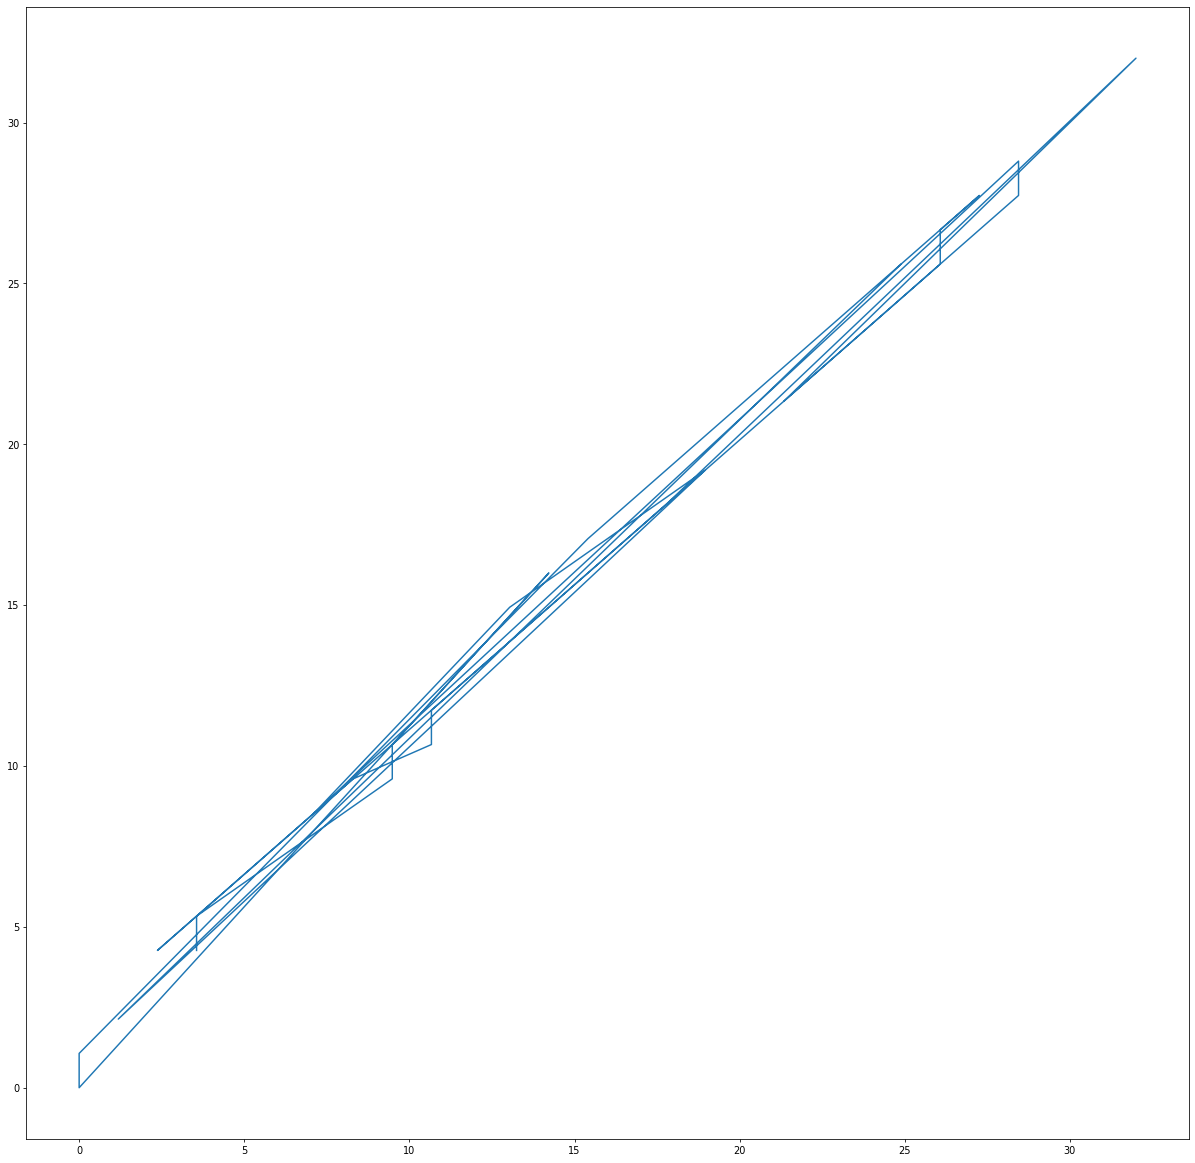

In [134]:
plt.figure(figsize=(1500/70 ,1500/70), dpi = 70)
plt.plot(x, y)
plt.savefig("testhoe.png", dpi = 70)